# Modelos de Deep Learning para Predicción de Series de Tiempo en Bitcoin

#### 1. División de Conjuntos
- Construcción manual de los conjuntos de datos en entrenamiento, validación y prueba, extendiendo los pliegues según la Figuras 2-5 para los horizontes de predicción τ = 7, 14, 21 y 28 días

#### 2. Ajuste y Evaluación del Modelo
- Para cada combinación de parámetros, los modelos predictivos se ajustan en el conjunto de entrenamiento y son evaluados en el conjunto de validación usando métricas clave: MAPE, MAE, RMSE, MSE y R².
  
#### 3. Evaluación de Residuos
- Se construye una tabla con los resultados en el conjunto de entrenamiento que incluye pruebas de hipótesis para la independencia y normalidad de los residuos.
- Las columnas incluyen MAPE, MAE, RMSE, MSE, R², p-value de Ljung-Box y p-value de Jarque-Bera, junto con visualizaciones de la serie de residuos, QQPlot y ACF.

#### 4. Validación y Test
- Para el conjunto de test, se resumen los resultados por modelo en una tabla con MAPE, MAE, RMSE, MSE, R² y p-value de Ljung-Box.
  
#### 5. Configuración de Parámetros
- Configuración de τ en los conjuntos de validación y test: 7, 14, 21, 28 días.
- Configuración de tamaño de entrenamiento considerando combinaciones de 7, 14, 21, y 28 filas y columnas.

#### 6. Optimización de Modelos
- Variaciones de hiperparámetros: Dropout (0.2, 0.4, 0.6, 0.8), Neuronas en una capa (10, 100, 1000, 10000), y Batchsize (16, 32, 64, 128) para encontrar la combinación con menor error.
  
#### 7. Visualización de Resultados
- Curva Runs vs Error para cada conjunto (entrenamiento, validación y prueba) en función de las iteraciones.
- Boxplots de los errores para cada set (train/validation/test) mostrando que las medianas de los tres se aproximan.
- Gráficas que representan la serie de tiempo original, los conjuntos de validación y test, y las predicciones para cada horizonte τ = 7, 14, 21 y 28 días.

#### Modelos Aplicados
1. **MLP (Multilayer Perceptron)**
2. **RNN (Recurrent Neural Network)**
3. **LSTM (Long Short-Term Memory)**

Estos modelos se emplean y ajustan para evaluar su desempeño en la predicción de series de tiempo complejas, basándose en datos históricos de precios de Bitcoin, retorno acumulado y volatilidad, capturando patrones temporales de corto y mediano plazo.

#### 3. Evaluación de Residuos
- Se construye una tabla con los resultados en el conjunto de entrenamiento que incluye pruebas de hipótesis para la independencia y normalidad de los residuos.
- Las columnas incluyen MAPE, MAE, RMSE, MSE, R², p-value de Ljung-Box y p-value de Jarque-Bera, junto con visualizaciones de la serie de residuos, QQPlot y ACF.

#### 4. Validación y Test
- Para el conjunto de test, se resumen los resultados por modelo en una tabla con MAPE, MAE, RMSE, MSE, R² y p-value de Ljung-Box.
  
#### 5. Configuración de Parámetros
- Configuración de τ en los conjuntos de validación y test: 7, 14, 21, 28 días.
- Configuración de tamaño de entrenamiento considerando combinaciones de 7, 14, 21, y 28 filas y columnas.

#### 6. Optimización de Modelos
- Variaciones de hiperparámetros: Dropout (0.2, 0.4, 0.6, 0.8), Neuronas en una capa (10, 100, 1000, 10000), y Batchsize (16, 32, 64, 128) para encontrar la combinación con menor error.
  
#### 7. Visualización de Resultados
- Curva Runs vs Error para cada conjunto (entrenamiento, validación y prueba) en función de las iteraciones.
- Boxplots de los errores para cada set (train/validation/test) mostrando que las medianas de los tres se aproximan.
- Gráficas que representan la serie de tiempo original, los conjuntos de validación y test, y las predicciones para cada horizonte τ = 7, 14, 21 y 28 días.

#### Modelos Aplicados
1. **MLP (Multilayer Perceptron)**
2. **RNN (Recurrent Neural Network)**
3. **LSTM (Long Short-Term Memory)**

Estos modelos se emplean y ajustan para evaluar su desempeño en la predicción de series de tiempo complejas, basándose en datos históricos de precios de Bitcoin, retorno acumulado y volatilidad, capturando patrones temporales de corto y mediano plazo.


# Procesamiento de Datos para Series de Tiempo en Precios de Bitcoin

### 1. Carga y Limpieza del Dataset


1. **Limpieza de Columnas Numéricas**:
   - Las columnas numéricas clave (`Price`, `Open`, `High`, `Low`, `Vol.`, `Change %`) se han limpiado para eliminar caracteres no numéricos, como comas y símbolos de porcentaje.
   - Este proceso asegura que los datos estén en un formato adecuado para realizar cálculos numéricos sin errores.

2. **Conversión y Organización de Fechas**:
   - La columna `Date` se ha convertido al tipo `datetime` y se ha configurado como índice del `DataFrame`.
   - Posteriormente, los datos se ordenaron en orden ascendente por fecha, garantizando la secuencia cronológica.
   - Se ha agregado una columna `ID` que corresponde al índice de fechas, lo cual permite rastrear cada punto temporal de manera precisa.



In [33]:
import pandas as pd

# Paso 1: Cargar el archivo CSV en el DataFrame
Historial_precios = pd.read_csv("Bitcoin_Historical_Data.csv")

# Paso 2: Limpiar las columnas numéricas eliminando comas y caracteres no numéricos
num_cols = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
for col in num_cols:
    Historial_precios[col] = Historial_precios[col].replace({',': '', '%': ''}, regex=True)
    Historial_precios[col] = pd.to_numeric(Historial_precios[col], errors='coerce')  # Convertir a numérico

# Paso 3: Convertir 'Date' a datetime, establecer como índice y ordenar por fecha
Historial_precios['Date'] = pd.to_datetime(Historial_precios['Date'])
Historial_precios.sort_values(by='Date', ascending=True, inplace=True)
Historial_precios.set_index('Date', inplace=True)
Historial_precios['ID'] = Historial_precios.index

# Confirmar la limpieza y orden de los datos
print("Datos después de la limpieza y orden:")
Historial_precios


Datos después de la limpieza y orden:


,Price,Open,High,Low,Vol.,Change %,ID
Date,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,NaN,0.00,2010-07-18
2010-07-19,0.1,0.1,0.1,0.1,NaN,0.00,2010-07-19
2010-07-20,0.1,0.1,0.1,0.1,NaN,0.00,2010-07-20
2010-07-21,0.1,0.1,0.1,0.1,NaN,0.00,2010-07-21
2010-07-22,0.1,0.1,0.1,0.1,NaN,0.00,2010-07-22
...,...,...,...,...,...,...,...
2024-03-20,67854.0,62046.8,68029.5,60850.9,NaN,9.35,2024-03-20
2024-03-21,65503.8,67860.0,68161.7,64616.1,NaN,-3.46,2024-03-21
2024-03-22,63785.5,65501.5,66633.3,62328.3,NaN,-2.62,2024-03-22



### 2. Cálculo de Retornos y Volatilidad

1. **Retorno Diario**:
   - Se ha calculado el retorno diario (`Retorno_Diario`) utilizando el método de cambio porcentual diario sobre la columna `Price`

2. **Retorno Acumulado**:
   - A partir del retorno diario, se ha generado una columna `Retorno_Acumulado`, que acumula los cambios diarios a lo largo del tiempo.
3. **Volatilidad en Ventanas Móviles**:
   - Se ha calculado la volatilidad de los retornos diarios utilizando ventanas móviles de tamaño 7, 14, 21 y 28 días.
   - Para cada ventana, se calcula la desviación estándar de los retornos diarios, lo cual mide la variabilidad y el riesgo asociado con los precios de Bitcoin en intervalos temporales específicos.
   - Las columnas `Volatilidad_7`, `Volatilidad_14`, `Volatilidad_21`, y `Volatilidad_28` reflejan la volatilidad correspondiente a cada ventana, permitiendo observar los patrones de riesgo en distintas escalas temporales.

In [34]:
# Paso 5: Calcular el retorno diario y agregarlo como una columna 'Retorno_Diario'
Historial_precios['Retorno_Diario'] = Historial_precios['Price'].pct_change()

# Paso 6: Calcular el retorno acumulado y agregarlo como 'Retorno_Acumulado'
Historial_precios['Retorno_Acumulado'] = Historial_precios['Retorno_Diario'].cumsum()

# Paso 7: Calcular la volatilidad para cada ventana y agregarla al DataFrame
ventanas = [7, 14, 21, 28]
for ventana in ventanas:
    Historial_precios[f'Volatilidad_{ventana}'] = Historial_precios['Retorno_Diario'].rolling(window=ventana).std()

# Confirmar el cálculo de retornos y volatilidad
print("Datos después del cálculo de retornos y volatilidad:")
Historial_precios


Datos después del cálculo de retornos y volatilidad:


,Price,Open,High,Low,Vol.,Change %,ID,Retorno_Diario,Retorno_Acumulado,Volatilidad_7,Volatilidad_14,Volatilidad_21,Volatilidad_28
Date,,,,,,,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,NaN,0.00,2010-07-18,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.1,0.1,0.1,0.1,NaN,0.00,2010-07-19,0.000000,0.000000,NaN,NaN,NaN,NaN
2010-07-20,0.1,0.1,0.1,0.1,NaN,0.00,2010-07-20,0.000000,0.000000,NaN,NaN,NaN,NaN
2010-07-21,0.1,0.1,0.1,0.1,NaN,0.00,2010-07-21,0.000000,0.000000,NaN,NaN,NaN,NaN
2010-07-22,0.1,0.1,0.1,0.1,NaN,0.00,2010-07-22,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-20,67854.0,62046.8,68029.5,60850.9,NaN,9.35,2024-03-20,0.093537,23.719802,0.060681,0.044544,0.044059,0.043374
2024-03-21,65503.8,67860.0,68161.7,64616.1,NaN,-3.46,2024-03-21,-0.034636,23.685166,0.061287,0.045543,0.044563,0.044045
2024-03-22,63785.5,65501.5,66633.3,62328.3,NaN,-2.62,2024-03-22,-0.026232,23.658934,0.061256,0.045630,0.044883,0.044397


In [35]:
print(Historial_precios['Price'].describe())  # Muestra estadísticas generales
print(Historial_precios['Price'].head(10))    # Muestra los primeros valores para inspección


count     4999.000000
mean     10812.283337
std      15892.032468
min          0.100000
25%        226.700000
50%       1975.100000
75%      15450.150000
max      73066.300000
Name: Price, dtype: float64
Date
2010-07-18    0.1
2010-07-19    0.1
2010-07-20    0.1
2010-07-21    0.1
2010-07-22    0.1
2010-07-23    0.1
2010-07-24    0.1
2010-07-25    0.1
2010-07-26    0.1
2010-07-27    0.1
Name: Price, dtype: float64


# Proceso de Generación de Pliegues para Series Temporales en Bitcoin

1. **Definición de Parámetros Clave**:
   - *Horizonte de Predicción (`tau`)*: Representa los pasos adelante que el modelo debe predecir.
   - *Ventana (`omega`)*: Tamaño de la ventana temporal que se usará para generar las secuencias en cada conjunto.
   - *Tamaño de Entrenamiento (`train_size`)*: Define la longitud de la secuencia histórica usada para entrenar el modelo en cada pliegue.

2. **Proceso de Generación de Pliegues**:
   - El proceso avanza a través de la serie temporal, comenzando cada nuevo pliegue justo después del último dato de prueba (`X_test`) del pliegue anterior.
   - Cada pliegue genera tres conjuntos:
     - *Entrenamiento (`X_train`, `y_train`)*: Usa datos hasta `train_size`, extrayendo ventanas de tamaño `omega`.
     - *Validación (`X_val`, `y_val`)*: Utiliza una ventana de validación de tamaño `omega` para evaluar el modelo durante el ajuste.
     - *Prueba (`X_test`, `y_test`)*: Usa una ventana de prueba de tamaño `omega` para evaluar el rendimiento final del modelo en datos no vistos.


### 3. Aplicación a la Serie de Precio de Bitcoin
   - Se utiliza la columna `Price` de `Historial_precios` para generar estos pliegues.
   - Esste es un ejemplo basico de la estructura de los pligues



In [36]:
import pandas as pd
import warnings
import logging
logging.captureWarnings(True)


def generar_pliegues(data, tau, omega, train_size):

    n_samples = len(data)
    pliegues = []
    start = 0  # Índice inicial para cada pliegue

    # Iterar hasta que no haya suficiente espacio para un nuevo pliegue
    while start + train_size + 2 * omega + tau - 1 < n_samples:
        # Definir índices de fin para cada conjunto
        x_train_end = start + train_size
        x_val_start = x_train_end
        x_val_end = x_val_start + omega
        x_test_start = x_val_end
        x_test_end = x_test_start + omega

        # Generar conjuntos de entrenamiento, validación y prueba
        X_train = [data[i:i + omega].tolist() for i in range(start, x_train_end)]
        y_train = [float(data[i + omega + tau - 1]) for i in range(start, x_train_end)]
        
        X_val = [data[i:i + omega].tolist() for i in range(x_val_start, x_val_end)]
        y_val = [float(data[i + omega + tau - 1]) for i in range(x_val_start, x_val_end)]

        X_test = [data[i:i + omega].tolist() for i in range(x_test_start, x_test_end)]
        y_test = [float(data[i + omega + tau - 1]) for i in range(x_test_start, x_test_end)]

        # Agregar el pliegue a la lista
        pliegues.append({
            "X_train": X_train,
            "y_train": y_train,
            "X_val": X_val,
            "y_val": y_val,
            "X_test": X_test,
            "y_test": y_test
        })

        # Actualizar el índice inicial para el siguiente pliegue
        start = x_test_end  # El siguiente pliegue comienza después del último valor de X_test

    return pliegues

# Aplicar la función a la columna 'Price' del DataFrame
tau = 1       # Horizonte de predicción
omega = 7     # Tamaño de la ventana
train_size = 14  # Tamaño del conjunto de entrenamiento

splits = generar_pliegues(Historial_precios['Price'], tau, omega, train_size)
df_pliegues = pd.DataFrame(splits)
df_pliegues


,X_train,y_train,X_val,y_val,X_test,y_test
0,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0....","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0....","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]","[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0....","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]"
1,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0....","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0....","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]","[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0....","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]"
2,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0....","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0....","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]","[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0....","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]"
3,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0....","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[[0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2], [0.1, 0....","[0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.4]","[[0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.4], [0.2, 0....","[0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3]"
4,"[[0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3], [0.2, 0....","[0.3, 0.3, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, ...","[[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3], [0.3, 0....","[0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.2]","[[0.3, 0.2, 0.2, 0.2, 0.3, 0.3, 0.2], [0.2, 0....","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]"
...,...,...,...,...,...,...
173,"[[29984.2, 33041.8, 33917.0, 34496.8, 34153.7,...","[34526.7, 34477.9, 34650.6, 35423.8, 34931.4, ...","[[35019.4, 35042.0, 35426.1, 35636.9, 36700.5,...","[37064.4, 36478.3, 35549.3, 37874.9, 36161.2, ...","[[37064.4, 36478.3, 35549.3, 37874.9, 36161.2,...","[37354.2, 37454.1, 35813.6, 37410.8, 37293.1, ..."
174,"[[37354.2, 37454.1, 35813.6, 37410.8, 37293.1,...","[37451.8, 37248.6, 37823.3, 37855.5, 37712.9, ...","[[39970.2, 41987.8, 44076.2, 43776.3, 43289.7,...","[43791.0, 41256.1, 41487.0, 42884.5, 43025.9, ...","[[43791.0, 41256.1, 41487.0, 42884.5, 43025.9,...","[41368.7, 42659.7, 42259.3, 43662.8, 43865.9, ..."
175,"[[41368.7, 42659.7, 42259.3, 43662.8, 43865.9,...","[42981.5, 43578.5, 42513.3, 43446.5, 42581.1, ...","[[42272.5, 44183.4, 44943.7, 42836.1, 44157.0,...","[43927.3, 46962.2, 46129.0, 46629.3, 46348.2, ...","[[43927.3, 46962.2, 46129.0, 46629.3, 46348.2,...","[41746.1, 42510.7, 43145.5, 42768.7, 41292.7, ..."
176,"[[41746.1, 42510.7, 43145.5, 42768.7, 41292.7,...","[41583.2, 39556.4, 39888.8, 40086.0, 39935.7, ...","[[42030.7, 43299.8, 42946.2, 42580.5, 43081.4,...","[42581.4, 42697.2, 43087.7, 44339.8, 45293.3, ...","[[42581.4, 42697.2, 43087.7, 44339.8, 45293.3,...","[48277.3, 49941.3, 49716.0, 51782.4, 51901.3, ..."


In [37]:
# Mostrar los primeros pliegues para confirmar
for i, split in enumerate(splits[:4], start=1):
    print(f"Pliegue {i}:")
    for key, value in split.items():
        print(f"{key}: {value}")
    print("\n---\n")

Pliegue 1:
X_train: [[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]
y_train: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
X_val: [[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]
y_val: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
X_test: [[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1,

# Visualización de Pliegues de Entrenamiento para Valores de Tau

## Resumen del Proceso

Este gráfico muestra cómo se estructuran los conjuntos de `X_train` y `Y_train` en función de distintos valores de horizonte de predicción (`tau = 1, 2, 3, 7`). Cada subgráfico ilustra un `tau` específico, permitiendo observar cómo cambia la longitud de `Y_train` y cómo se mantiene el orden temporal en los pliegues de entrenamiento.

### Detalles Clave
- **Parámetros**: 
  - `omega = 7`: Tamaño de ventana de `X_train`.
  - `train_size = 14`: Longitud de `X_train`.
- **Colores**:
  - `X_train` en azul y `Y_train` en naranja.
- **Estructura de Pliegues**: 
  - `X_train` ocupa las primeras posiciones; `Y_train` sigue según el valor de `tau`, garantizando la secuencia temporal.

Esto permite visualizar la comparación y verificación de los pliegues en función de distintos horizontes `tau`.


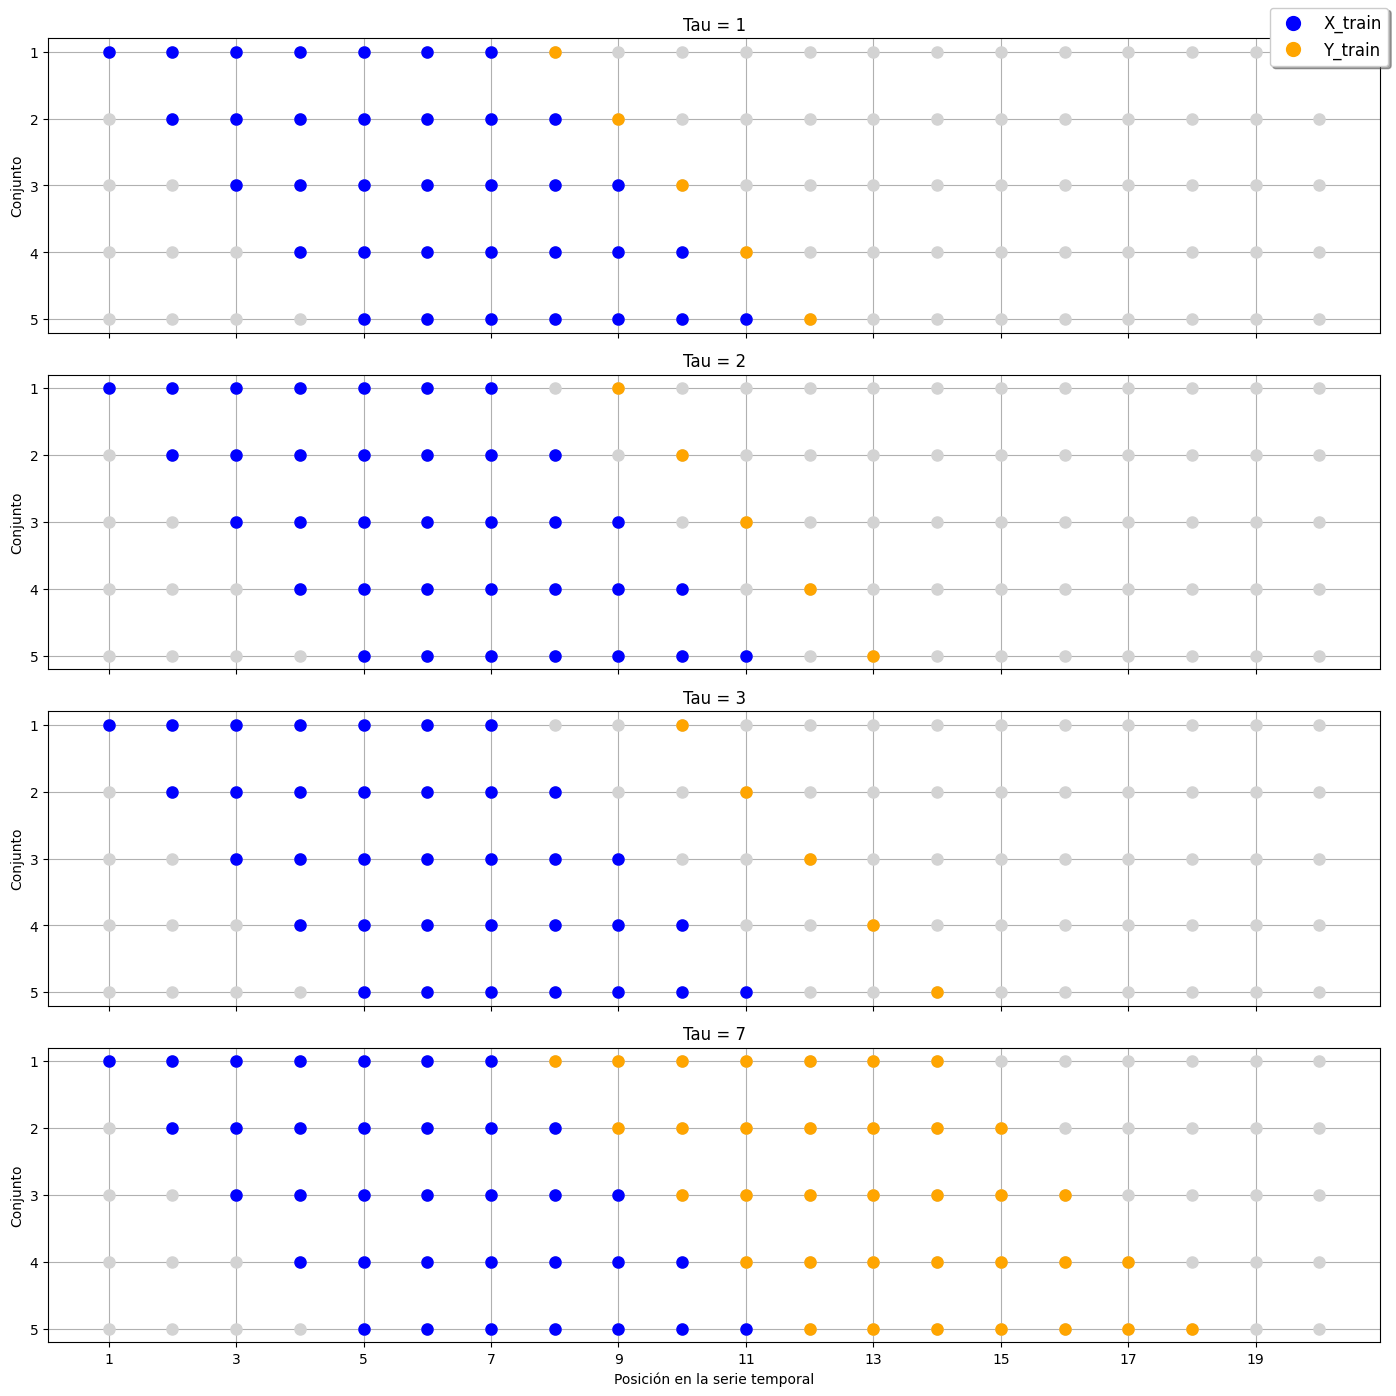

In [38]:
import matplotlib.pyplot as plt
logging.captureWarnings(True)

import matplotlib.pyplot as plt
import warnings

# Ignorar advertencias dentro de este bloque
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Parámetros
tau_values = [1, 2, 3, 7]  # Valores de tau a graficar
omega = 7
train_size = 14

# Crear figura para graficar
fig, axes = plt.subplots(len(tau_values), 1, figsize=(14, 14), sharex=True)
colors = {"x_train": "blue", "y_train": "orange", "empty": "lightgray"}

# Generar gráficos para cada valor de tau
for tau_idx, tau in enumerate(tau_values):
    ax = axes[tau_idx]
    splits = generar_pliegues(Historial_precios['Price'], tau, omega, train_size)
    
    for i in range(5):  # Limitar a los primeros 5 conjuntos
        x_train_pos = [j + 1 for j in range(i, i + omega)]
        
        # Obtener y_train según el tau actual o combinarlos si es tau=7
        if tau < 7:
            y_train_pos = [i + omega + tau]
        else:
            y_train_pos = [i + omega + t for t in range(1, 8)]  # Combinar y_train para tau=7

        # Graficar puntos vacíos en todo el rango (1-20) para cada conjunto
        for pos in range(1, 21):
            ax.plot(pos, 5 - i, 'o', color=colors["empty"], markersize=8)  # Invertir el orden en y

        # Graficar X_train
        for x_pos in x_train_pos:
            ax.plot(x_pos, 5 - i, 'o', color=colors["x_train"], markersize=8)  # Invertir el orden en y

        # Graficar y_train
        for y_pos in y_train_pos:
            ax.plot(y_pos, 5 - i, 'o', color=colors["y_train"], markersize=8)  # Invertir el orden en y

    # Configuración de cada subgráfico
    ax.set_title(f'Tau = {tau}')
    ax.set_yticks(range(1, 6))
    ax.set_yticklabels([5, 4, 3, 2, 1])  # Invertir etiquetas de los conjuntos
    ax.set_ylabel("Conjunto")
    ax.grid(True)

# Ajustes finales del eje x con escala personalizada
axes[-1].set_xticks(range(1, 21, 2))  # Escala de 2 en 2 hasta 20
axes[-1].set_xlabel("Posición en la serie temporal")

# Crear marcadores personalizados para la leyenda
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors["x_train"], markersize=10, label="X_train"),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors["y_train"], markersize=10, label="Y_train")
]

# Añadir leyenda con colores en la esquina superior derecha
fig.legend(handles=legend_elements, loc='upper right', markerscale=1.2,
           fontsize='large', frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()


# Generación de Pliegues Multivariados para Series Temporales

Esta función, `generar_pliegues_multivariados`, crea pliegues estructurados de entrenamiento, validación y prueba para un análisis de series temporales multivariadas, asegurando la secuencia temporal y utilizando ventanas móviles para predicciones.

### Detalles Clave
- **Parámetros**:
  - `data`: DataFrame de series temporales con precios, retorno acumulado y volatilidad.
  - `tau`: Horizonte de predicción.
  - `omega`: Tamaño de la ventana.
  - `train_size`: Tamaño del conjunto de entrenamiento.
- **Procesamiento**:
  - Filtrado de filas con datos incompletos en volatilidad o retorno acumulado.
  - Creación de secuencias `X` para entrenamiento, validación y prueba, asegurando consistencia en la longitud de cada secuencia.
  - Normalización de las secuencias `X` y `y` para mejorar el entrenamiento de modelos.
- **Resultados**:
  - Lista de pliegues estructurados, donde cada pliegue contiene `X_train`, `y_train`, `X_val`, `y_val`, `X_test` y `y_test` normalizados.


In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def generar_pliegues_multivariados(data, tau, omega, train_size)
    # Seleccionar columnas de volatilidad y retorno acumulado en función de omega y eliminar datos vacíos
    vol_col = f'Volatilidad_{omega}'
    data = data.dropna(subset=[vol_col, 'Retorno_Acumulado'])  # Eliminar filas con NaN en volatilidad o retorno acumulado
    
    n_samples = len(data)
    pliegues = []
    start = 0

    # Iterar hasta que no haya suficiente espacio para un nuevo pliegue
    while start + train_size + 2 * omega + tau - 1 < n_samples:
        x_train_end = start + train_size
        x_val_start = x_train_end
        x_val_end = x_val_start + omega
        x_test_start = x_val_end
        x_test_end = x_test_start + omega

        # Obtener conjuntos de entrenamiento, validación y prueba para X
        X_train = [data[vol_col].iloc[i:i + omega].tolist() for i in range(start, x_train_end)]
        X_val = [data[vol_col].iloc[i:i + omega].tolist() for i in range(x_val_start, x_val_end)]
        X_test = [data[vol_col].iloc[i:i + omega].tolist() for i in range(x_test_start, x_test_end)]

        # Verificar que todas las secuencias tengan la misma longitud
        if not all(len(seq) == omega for seq in X_train + X_val + X_test):
            start = x_test_end  # Avanzar al siguiente pliegue si hay inconsistencia
            continue  # Ignorar este pliegue y pasar al siguiente
        
        # Normalización de X
        scaler_x = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_val_scaled = scaler_x.transform(X_val)
        X_test_scaled = scaler_x.transform(X_test)

        # Generar y solo si hay suficientes datos para completar tau
        y_train = [data['Price'].iloc[i + omega:i + omega + tau].tolist() 
                   for i in range(start, x_train_end) if i + omega + tau <= n_samples]
        y_val = [data['Price'].iloc[i + omega:i + omega + tau].tolist() 
                 for i in range(x_val_start, x_val_end) if i + omega + tau <= n_samples]
        y_test = [data['Price'].iloc[i + omega:i + omega + tau].tolist() 
                  for i in range(x_test_start, x_test_end) if i + omega + tau <= n_samples]
        
        # Normalización de y después del filtrado
        scaler_y = MinMaxScaler()
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1)).reshape(len(y_train), tau)
        y_val_scaled = scaler_y.transform(np.array(y_val).reshape(-1, 1)).reshape(len(y_val), tau)
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1)).reshape(len(y_test), tau)

        # Agregar el pliegue a la lista
        pliegues.append({
            "X_train": X_train_scaled,
            "y_train": y_train_scaled,
            "X_val": X_val_scaled,
            "y_val": y_val_scaled,
            "X_test": X_test_scaled,
            "y_test": y_test_scaled,
            "scaler_y": scaler_y  # Guardar el escalador para desescalar predicciones
        })

        # Avanzar al siguiente pliegue
        start = x_test_end

    return pliegues


# Entrenamiento de Modelos de Deep Learning para Series Temporales

## Descripción del Proceso

Este script configura y evalúa tres modelos de deep learning (MLP, RNN y LSTM) en series temporales para predicción multivariada, con difrentes hiperparámetros. Para cada combinación de parámetros, se emplean métricas de error y pruebas de hipótesis sobre los residuos, optimizando mediante ejecución paralela.

### Detalles del Procedimiento

1. **Cálculo de Métricas y Pruebas de Hipótesis**:
   - Se calculan métricas de error como *MAPE*, *MAE*, *RMSE*, *MSE* y *R²*.
   - Las pruebas de hipótesis (Ljung-Box y Jarque-Bera) evalúan independencia y normalidad en los residuos.

2. **Modelos**:
   - **MLP**: Redes neuronales de capas múltiples.
   - **RNN**: Redes neuronales recurrentes.
   - **LSTM**: Redes con memoria de largo plazo.

3. **Generación de Pliegues y Configuración de Hiperparámetros**:
   - Se generan pliegues de entrenamiento, validación y prueba de forma independiente, asegurando secuencia temporal.
   - Parámetros: `tau` (horizonte de predicción), `omega` (ventana de observación), `train_size` (tamaño de entrenamiento).

4. **Ejecución Paralela con ThreadPoolExecutor**:
   - Cada pliegue y modelo se entrena en paralelo para cada combinación de parámetros.

5. **Resultados**:
   - Los resultados de métricas y pruebas se almacenan y presentan en un DataFrame, y se guardan en un archivo CSV y TXT.


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from tqdm import tqdm
import os
from concurrent.futures import ThreadPoolExecutor

os.environ['KERAS_TQDM_DISABLE'] = '1'  # Desactiva Tqdm en Keras

# Funciones de métricas y pruebas de hipótesis
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return {"MAPE": mape, "MAE": mae, "RMSE": rmse, "MSE": mse, "R2": r2}

def pruebas_hipotesis(residuos):
    ljung_box = acorr_ljungbox(residuos, lags=[10], return_df=True)
    jarque_bera_test = jarque_bera(residuos)
    return {"Ljung-Box p-value": ljung_box["lb_pvalue"].iloc[0], "Jarque-Bera p-value": jarque_bera_test[1]}

# Definición de modelos
def construir_mlp(input_shape, output_units):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(50, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(output_units)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def construir_rnn(input_shape, output_units):
    model = tf.keras.models.Sequential([
        tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(output_units)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def construir_lstm(input_shape, output_units):
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(50, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(output_units)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Entrenar y evaluar modelo por pliegue con manejo de excepciones
def entrenar_y_evaluar_modelo(modelo, pliegue):
    try:
        X_train, y_train = pliegue["X_train"], pliegue["y_train"]
        X_val, y_val = pliegue["X_val"], pliegue["y_val"]
        X_test, y_test = pliegue["X_test"], pliegue["y_test"]
        scaler_y = pliegue["scaler_y"]

        modelo.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

        # Validación
        y_val_pred = scaler_y.inverse_transform(modelo.predict(X_val, verbose=0).reshape(-1, 1))
        y_val_true = scaler_y.inverse_transform(y_val.reshape(-1, 1))
        metricas_val = calcular_metricas(y_val_true, y_val_pred)
        pruebas_val = pruebas_hipotesis((y_val_true - y_val_pred).flatten())

        # Prueba (Test)
        y_test_pred = scaler_y.inverse_transform(modelo.predict(X_test, verbose=0).reshape(-1, 1))
        y_test_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))
        metricas_test = calcular_metricas(y_test_true, y_test_pred)
        pruebas_test = pruebas_hipotesis((y_test_true - y_test_pred).flatten())

        return metricas_val, pruebas_val, metricas_test, pruebas_test

    except ValueError as e:
        return None, None, None, None

# Configuración de hiperparámetros
tau_values = [7, 14, 21, 28]
omega_values = [7, 14, 21, 28]
train_sizes = [7, 14, 21, 28]

mejores_resultados = []

# Barra de progreso única para el proceso completo
total_iterations = len(tau_values) * len(omega_values) * len(train_sizes) * 3  # 3 modelos por combinación
with tqdm(total=total_iterations, desc="Entrenamiento y Evaluación de Modelos") as pbar:
    for tau in tau_values:
        for omega in omega_values:
            for train_size in train_sizes:
                pliegues = generar_pliegues_multivariados(Historial_precios, tau, omega, train_size)
                
                # Uso de ThreadPoolExecutor para la paralelización
                with ThreadPoolExecutor() as executor:
                    futures = []
                    for modelo_tipo in ["MLP", "RNN", "LSTM"]:
                        if modelo_tipo == "MLP":
                            modelo = construir_mlp((omega,), tau)
                        elif modelo_tipo == "RNN":
                            modelo = construir_rnn((omega, 1), tau)
                        elif modelo_tipo == "LSTM":
                            modelo = construir_lstm((omega, 1), tau)
                        
                        # Ejecutar paralelamente cada pliegue
                        futures.extend([executor.submit(entrenar_y_evaluar_modelo, modelo, pliegue) for pliegue in pliegues])
                    
                    # Obtención de resultados y actualización de progreso
                    for future in futures:
                        resultado = future.result()
                        if resultado:
                            metricas_val, pruebas_val, metricas_test, pruebas_test = resultado
                            mejores_resultados.append({
                                "Modelo": modelo_tipo, "tau": tau, "omega": omega, "train_size": train_size,
                                "metricas_val": metricas_val, "pruebas_val": pruebas_val,
                                "metricas_test": metricas_test, "pruebas_test": pruebas_test
                            })
                        pbar.update(1)

# Guardar los resultados completos en CSV y los mejores en TXT
df_resultados = pd.DataFrame([{
    "Modelo": res["Modelo"],
    "tau": res["tau"],
    "omega": res["omega"],
    "train_size": res["train_size"],
    **res["metricas_test"],
    **res["pruebas_test"]
} for res in mejores_resultados])
df_resultados.to_csv("resultados_completos.csv", index=False)

with open("mejores_resultados.txt", "w") as file:
    for resultado in mejores_resultados:
        file.write(f"{resultado}\n")

# Mostrar los mejores resultados en la consola
print("Mejores resultados por modelo y configuración de parámetros:")
for resultado in mejores_resultados:
    print(resultado)
